## Сравнения, маски и булева логика. Маскирование (masking).

In [ ]:
# использование булевых масок удобно для извлечения, модификации, подсчета и др. манипуляций со значениями 
# по какому-либо критерию. Например подсчета всех значения выше или ниже порога, или удаления всех аномальных значений.

### Подсчет кол-ва дождливых дней:

In [1]:
import numpy as np
import pandas as pd

In [4]:
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values

In [5]:
rainfall

array([  0,  41,  15,   0,   0,   3, 122,  97,  58,  43, 213,  15,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   5,   0,   0,   0,   0,
         0,  89, 216,   0,  23,  20,   0,   0,   0,   0,   0,   0,  51,
         5, 183, 170,  46,  18,  94, 117, 264, 145, 152,  10,  30,  28,
        25,  61, 130,   3,   0,   0,   0,   5, 191, 107, 165, 467,  30,
         0, 323,  43, 188,   0,   0,   5,  69,  81, 277,   3,   0,   5,
         0,   0,   0,   0,   0,  41,  36,   3, 221, 140,   0,   0,   0,
         0,  25,   0,  46,   0,   0,  46,   0,   0,   0,   0,   0,   0,
         5, 109, 185,   0, 137,   0,  51, 142,  89, 124,   0,  33,  69,
         0,   0,   0,   0,   0, 333, 160,  51,   0,   0, 137,  20,   5,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
         0,  56,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  18,  64,   0,   5,  36,  13,   0,
         8,   3,   0,   0,   0,   0,   0,   0,  18,  23,   0,   

In [6]:
rainfall.size

365

In [7]:
inches = rainfall/254  # 1/10mm => inches

In [9]:
inches.shape

(365,)

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <BarContainer object of 40 artists>)

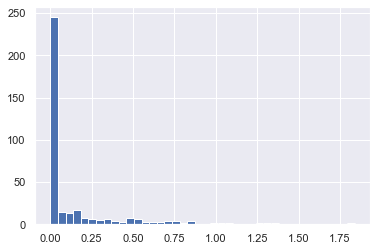

In [11]:
plt.hist(inches, 40)

### Операторы сравнения как универсальные ф-ии

In [12]:
x = np.arange(1,10).reshape(3,3)

In [13]:
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [14]:
x < 3

array([[ True,  True, False],
       [False, False, False],
       [False, False, False]])

In [15]:
x <= 3

array([[ True,  True,  True],
       [False, False, False],
       [False, False, False]])

In [16]:
x > 3

array([[False, False, False],
       [ True,  True,  True],
       [ True,  True,  True]])

In [17]:
x >= 3

array([[False, False,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [18]:
x != 3

array([[ True,  True, False],
       [ True,  True,  True],
       [ True,  True,  True]])

In [19]:
x == 3

array([[False, False,  True],
       [False, False, False],
       [False, False, False]])

In [20]:
(2 * x) == (x**2)

array([[False,  True, False],
       [False, False, False],
       [False, False, False]])

In [ ]:
# все операторы сравнения вызывают соответствующие операции (методы) для массивов NumPy:

In [ ]:
== np.equal
!= np.not_equal
<  np.less
<= np.less_equal
>  np.greater
>= np.greater_equal
# стр. 101
# результатом работы этих операторов всегда будет булев массив

### Работа с булевыми массивами:

In [21]:
rng = np.random.RandomState(0) # это типа np.random.seed(0) установка счетчика в ноль
x = rng.randint(10, size=(3,4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

#### Подсчет кол-ва элементов

In [23]:
np.count_nonzero(x < 6)

8

In [24]:
np.sum(x < 6)  # поскольку True = 1, False = 0

8

In [25]:
np.sum(x < 6, axis=1) # по каждой строке

array([4, 2, 2])

In [26]:
np.any(x > 8)  # существует ли хоть одно значение > 8

True

In [27]:
np.any(x < 0)

False

In [28]:
np.all(x < 10)  # все ли значения < 10

True

In [29]:
np.all(x < 9, axis = 1)  # проверка по осям

array([ True, False,  True])

In [ ]:
# с многомерными массивами работают только методы np.sum np.any np.all, стандартные методы sum... выдадут ошибку и медленные...

#### Булевы операторы:  & | ^  ~    NumPy перегружает и их.

In [30]:
np.sum((inches > 0.5) & (inches < 1))

29

In [32]:
np.sum(~((inches <= 0.5) | (inches >= 1)))

29

In [ ]:
&  np.bitwise_and
|  np.bitwise_or
^  np.bitwise_xor
~  np.bitwise_not

In [33]:
np.sum(inches == 0)

215

In [34]:
np.sum(inches != 0)

150

In [35]:
np.sum(inches > 0.5)

37

In [36]:
np.sum((inches > 0) & (inches < 0.2))

75

### Булевы массивы как маски

In [37]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [38]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [39]:
y = x < 5  # булев массив может быть записан в переменную

In [40]:
y

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [ ]:
# выбор значений отвечающих условию происходит путем индексирования исходного массива по булеву массиву
# такое метод носит название:
НАЛОЖЕНИЕ МАСКИ
МАСКИРОВАНИЕ

In [41]:
x[y]

array([0, 3, 3, 3, 2, 4])

In [42]:
x[x<5]

array([0, 3, 3, 3, 2, 4])

In [ ]:
# создание маски для всех дождливых дней:

In [43]:
rainy = (inches > 0)

In [45]:
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)

In [47]:
np.median(inches[rainy])

0.19488188976377951

In [48]:
np.median(inches[summer])

0.0

In [49]:
np.max(inches[summer])

0.8503937007874016

In [50]:
np.median(inches[rainy & ~summer])

0.20078740157480315

In [ ]:
Существует разница м/у операторами and/or и операторами & и |
операторы and/or определяют истинность или ложность всего объекта
тогда как & и | оперируют отдельными элементами (битами) внутри самого объекта

Массив булевых значений можно рассматривать как массив битов, где 1 = True и 0 = False